In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure this path is correct; it should reflect the actual location of your dataset in Drive
dataset_path = '/content/drive/MyDrive/fake_imagedataset'

# Add a check to see if the directory exists
import os
if not os.path.exists(dataset_path):
  raise ValueError(f"Dataset directory not found: {dataset_path}. Please check the path and ensure your Google Drive is mounted correctly.")


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% for training, 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
print(train_generator.class_indices)
print(train_generator.classes)  # Gives labels (0s and 1s) for each image in the training set
print(train_generator.samples)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2416 images belonging to 2 classes.
Found 604 images belonging to 2 classes.
{'fake': 0, 'real': 1}
[0 0 0 ... 1 1 1]
2416


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your extracted dataset folder
extract_path = '/content/drive/MyDrive/fake_imagedataset'  # This should match your unzip path

# Create ImageDataGenerator with rescaling and validation split
data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Create validation data generator (for confusion matrix)
validation_generator = data_gen.flow_from_directory(
    directory=extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Important: shuffle=False for correct label order
)


Found 604 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to dataset in Drive after uploading
dataset_path = '/content/drive/MyDrive/fake_imagedataset'  # <-- Change this path as per your dataset

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2416 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Since it's binary classification (real vs fake)
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # You can increase to 20 or more based on GPU availability
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 490s 6s/step - accuracy: 0.5095 - loss: 0.7532 - val_accuracy: 0.5972 - val_loss: 0.6667
Epoch 2/10
 1/75 ━━━━━━━━━━━━━━━━━━━━ 1:07 917ms/step - accuracy: 0.6562 - loss: 0.6826

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.6562 - loss: 0.6826 - val_accuracy: 0.5608 - val_loss: 0.6719
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6077 - loss: 0.6613 - val_accuracy: 0.5868 - val_loss: 0.6651
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - accuracy: 0.5312 - loss: 0.7242 - val_accuracy: 0.5451 - val_loss: 0.6761
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.6128 - loss: 0.6615 - val_accuracy: 0.6163 - val_loss: 0.6435
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.6250 - loss: 0.6667 - val_accuracy: 0.6215 - val_loss: 0.6421
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.6632 - loss: 0.6089 - val_accuracy: 0.6979 - val_loss: 0.5859
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.6875 - loss: 0.5764 - val_accuracy: 0.7083 - val_loss: 0.5832
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6947 - loss: 0.5821 - val_accuracy: 0.7101 - val_loss:

In [ ]:
model.save('/content/drive/MyDrive/fake_image_cnn_model.h5')


In [ ]:
model.save('my_model.keras')

In [ ]:
loss, acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 406ms/step - accuracy: 0.7012 - loss: 0.5731
Validation Accuracy: 69.21%


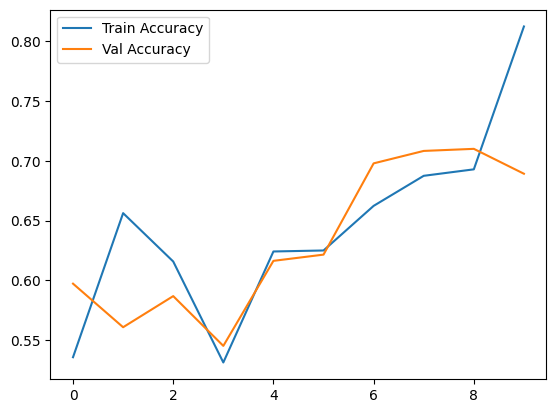

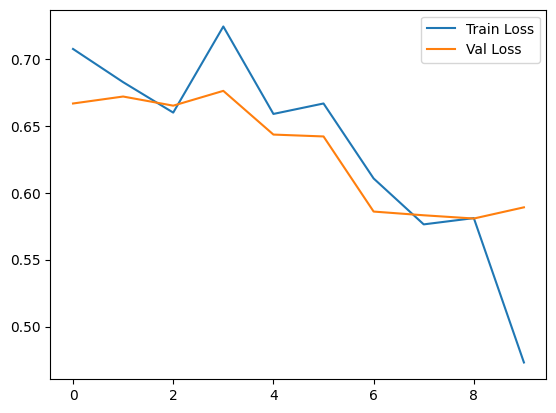

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fc1.png to fc1.png


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the uploaded image
img_path = 'WhatsApp Image 2025-04-19 at 12.37.04_ace60288.jpg'  # Replace with the name of your uploaded image

img = image.load_img(img_path, target_size=(128, 128))  # Same as model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize (since we used rescale=1./255 before)


In [ ]:
from tensorflow.keras.models import load_model
from google.colab import drive

# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

# Load your model from Google Drive
# Double-check this path to be absolutely sure it's correct!
model_path = '/content/drive/MyDrive/fake_image_cnn_model.h5'

# Check if the model file actually exists:
import os
if not os.path.exists(model_path):
  raise FileNotFoundError(f"Model file not found: {model_path}. Please verify the path and ensure the model was saved.")

model = load_model(model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model

# Load your model from Google Drive
model = load_model('/content/drive/MyDrive/fake_image_cnn_model.h5')


In [ ]:
# Make prediction
prediction = model.predict(img_array)

# Since we used sigmoid activation, output will be between 0 and 1
if prediction[0][0] >= 1.0:
    print("Prediction: FAKE IMAGE")
else:
    print("Prediction: REAL IMAGE")

print(f"Confidence Score: {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Prediction: REAL IMAGE
Confidence Score: 0.8725


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your 'test_images.zip'


Saving test_images.zip to test_images (1).zip


In [ ]:
import zipfile
import os

zip_path = 'test_images.zip'  # Replace with the uploaded zip file name

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('test_images')

# Now images are extracted in 'test_images/' directory


In [ ]:
import os

# Check the contents of the extracted folder
test_folder = 'test_images'  # Replace if you extracted elsewhere
print("Files inside test_images folder:")
print(os.listdir(test_folder))


Files inside test_images folder:
['test_images']


In [ ]:
from tensorflow.keras.models import load_model
import os

# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your model file
model_path = '/content/drive/MyDrive/fake_image_cnn_model.h5'

# Check if the file exists before trying to load it
if os.path.exists(model_path):
    model = load_model(model_path)
    print("Model loaded successfully!")
else:
    print(f"Error: Model file not found at {model_path}")
    print("Please check the file path and ensure the model was saved correctly.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model loaded successfully!


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/fake_image_cnn_model.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_folder = 'test_images/test_images'


# Check if folder exists and is not empty
if not os.path.exists(test_folder):
    print(f"Folder '{test_folder}' not found.")
elif len(os.listdir(test_folder)) == 0:
    print(f"Folder '{test_folder}' is empty.")
else:
    for filename in os.listdir(test_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"Processing: {filename}")  # Debug print
            img_path = os.path.join(test_folder, filename)
            img = image.load_img(img_path, target_size=(128, 128))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0

            prediction = model.predict(img_array)

            label = "FAKE" if prediction[0][0] >= 0.5 else "REAL"
            confidence = prediction[0][0] if label == "FAKE" else 1 - prediction[0][0]

            print(f"Image: {filename} | Prediction: {label} | Confidence: {confidence:.2f}")
        else:
            print(f"Skipped file: {filename} (not an image)")


Processing: 69388.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Image: 69388.jpg | Prediction: FAKE | Confidence: 0.63
Processing: 69458.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image: 69458.jpg | Prediction: FAKE | Confidence: 0.72
Processing: ZU9U4T5C7N.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Image: ZU9U4T5C7N.jpg | Prediction: FAKE | Confidence: 0.63
Processing: ZSRQ859YDA.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: ZSRQ859YDA.jpg | Prediction: REAL | Confidence: 0.62
Processing: 69562.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image: 69562.jpg | Prediction: REAL | Confidence: 0.52
Processing: 69471.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image: 69471.jpg | Prediction: FAKE | Confidence: 0.65
Processing: ZUWQ8FCLU9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: ZUWQ8FCLU9.jpg | Prediction: REAL | Confidence: 0.79
Processing: 69720.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: 69720.jpg | Prediction: FAKE | Confidence: 0.58
Processing: 69439.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('/content/drive/MyDrive/fake_image_cnn_model.h5')

# Path to the folder containing test images
test_folder = 'test_images'  # Update if needed

# Prepare a list to store predictions
results = []

# Loop through each image
for filename in os.listdir(test_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(test_folder, filename)

        try:
            # Preprocess image
            img = image.load_img(img_path, target_size=(128, 128))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0

            # Predict
            prediction = model.predict(img_array)
            label = "FAKE" if prediction[0][0] >= 0.5 else "REAL"
            confidence = float(prediction[0][0]) if label == "FAKE" else float(1 - prediction[0][0])

            # Append results
            results.append({
                "Filename": filename,
                "Prediction": label,
                "Confidence": round(confidence, 4)
            })

            print(f"Image: {filename} | Prediction: {label} | Confidence: {confidence:.2f}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")
            continue

# Convert to DataFrame
df = pd.DataFrame(results)

# Save to CSV
csv_path = '/content/predictions.csv'
df.to_csv(csv_path, index=False)

print(f"\n✅ Predictions saved to: {csv_path}")



✅ Predictions saved to: /content/predictions.csv


In [ ]:
from google.colab import files
files.download('/content/predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

test_folder = 'test_images'  # Make sure this matches the folder name
files = os.listdir(test_folder)

print(f"Total files found in '{test_folder}':", len(files))
print("Files:", files)


Total files found in 'test_images': 1
Files: ['test_images']


In [ ]:
from sklearn.metrics import f1_score


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import f1_score

# Load your trained model
model = load_model('/content/drive/MyDrive/fake_image_cnn_model.h5')

# Path to the folder containing test images
# Update if needed - Make sure this path is correct and the folder exists
test_folder = '/content/test_images/test_images'  # Update if needed


# Prepare lists to store predictions and ground truth labels
results = []
predicted_labels = []
val_labels = []  # You'll need to populate this with your actual validation labels

# Loop through each image
# Check if folder exists before looping
if os.path.exists(test_folder):
    for filename in os.listdir(test_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_folder, filename)

            try:
                # Preprocess image
                img = image.load_img(img_path, target_size=(128, 128))
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array /= 255.0

                # Predict
                prediction = model.predict(img_array)

                # Get predicted label (0 or 1)
                predicted_label = 1 if prediction[0][0] >= 0.5 else 0
                predicted_labels.append(predicted_label)

                # Append results (for CSV)
                label = "FAKE" if predicted_label == 1 else "REAL"  # Using predicted_label for consistency
                confidence = float(prediction[0][0]) if label == "FAKE" else float(1 - prediction[0][0])
                results.append({
                    "Filename": filename,
                    "Prediction": label,
                    "Confidence": round(confidence, 4)
                })

                print(f"Image: {filename} | Prediction: {label} | Confidence: {confidence:.2f}")

                # ***IMPORTANT***: Get the actual label (ground truth) for this image
                #  You need a way to determine if the image is actually FAKE or REAL
                #  Replace this with your logic to get the actual label:
                # actual_label = get_actual_label_for_image(filename)
                # val_labels.append(actual_label)

            except Exception as e:
                print(f"Error processing {filename}: {e}")
                continue
else:
    print(f"Error: Test folder '{test_folder}' not found.")

# Convert to DataFrame
df = pd.DataFrame(results)

# Save to CSV
csv_path = '/content/predictions.csv'
df.to_csv(csv_path, index=False)

print(f"\n✅ Predictions saved to: {csv_path}")

# Calculate F1 score (after the loop)
# Make sure val_labels is populated with actual labels before this line
# f1 = f1_score(val_labels, predicted_labels)
# print(f"F1 Score: {f1:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Image: 69388.jpg | Prediction: FAKE | Confidence: 0.63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: 69458.jpg | Prediction: FAKE | Confidence: 0.72
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: ZU9U4T5C7N.jpg | Prediction: FAKE | Confidence: 0.63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: ZSRQ859YDA.jpg | Prediction: REAL | Confidence: 0.62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: 69562.jpg | Prediction: REAL | Confidence: 0.52
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: 69471.jpg | Prediction: FAKE | Confidence: 0.65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: ZUWQ8FCLU9.jpg | Prediction: REAL | Confidence: 0.79
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: 69720.jpg | Prediction: FAKE | Confidence: 0.58
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: 69439.jpg | Prediction: FAKE | Confidence: 0.67
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Image: 69469.jpg | Prediction: REAL | Confidence: 0.59
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: ZRRZGIJSI